# AC290 Extreme Computing: Project-based High Performance Distributed and Parallel Systems

## Module 1: Influence Maximization Problem

<img src='img/AC290_IMP_graph1.png' style="width: 500px;">
<p style="text-align: center;">Yelp Reviewer Network</p>

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt


NameError: name 'sc' is not defined

## 1. Python

### 1.1. Time Profiling

We'll examine two different ways to profile run time of a function by using the following function below:

An example from http://www.huyng.com/posts/python-performance-analysis/

In [2]:
def primes(n): 
    if n == 2:
        return [2]
    elif n < 2:
        return []
    s = range(3,n+1,2)
    mroot = n ** 0.5
    half = (n + 1) / 2 - 1
    i = 0; m = 3;
    while m <= mroot:
        if s[i]:
            j = (m * m-3) / 2
            s[j] = 0
            while j < half:
                s[j] = 0
                j += m
        i = i + 1
        m = 2 * i + 3
    return [2]+[x for x in s if x]

The simplest method to evaluate your function's run time is to use Python's time module and manually print out the run time of your function.  This is a quick and dirty way to measure your function's performance.

In [4]:
import time

In [5]:
start = time.time()
prime_nums = primes(int(10e6))
duration = time.time() - start
print "%f Seconds" % duration

1.514536 Seconds


Using this approach, we can store the run time of the your function for analysis later on (mean, standard deviation, etc.). 

Expanding on this simple method, let's create a function decorator that will automate this process every time we want to evaluate a function's time performance.

In [6]:
from functools import wraps

def timefn(func):
    @wraps(func)
    def calc_time(*args, **kwargs):
        t1=time.time()
        result = func(*args,**kwargs)
        t2=time.time()
        print "@timefn: %.5f Seconds" % (t2-t1)
        return result
    return calc_time

In [7]:
@timefn
def primes(n): 
    if n == 2:
        return [2]
    elif n < 2:
        return []
    s = range(3,n+1,2)
    mroot = n ** 0.5
    half = (n + 1) / 2 - 1
    i = 0; m = 3;
    while m <= mroot:
        if s[i]:
            j = (m * m-3) / 2
            s[j] = 0
            while j < half:
                s[j] = 0
                j += m
        i = i + 1
        m = 2 * i + 3
    return [2]+[x for x in s if x]

In [8]:
prime_nums = primes(int(10e6))

@timefn: 1.98769 Seconds


Another simple method is to use iPython's %time magic function.

In [9]:
%time prime_nums = primes(int(10e6))

@timefn: 2.33925 Seconds
CPU times: user 2.33 s, sys: 23.7 ms, total: 2.35 s
Wall time: 2.36 s


### 1.2. Set vs List vs Tuple

>"One of the most important things in writing efficient programs is understanding the guarantees of the data structures you use.  In fact, a large part of performant programming is understanding what questions you are trying to ask of your data and picking a data structure that you can answer these questions quickly." - Gorelick & Ozsvald

Python provides 4 basic built-in data types - list, set, tuple, and dictionary (set without values).  We will compare the run time performance of each data types for different set of problems in order to understand which data structure provides the best solution to each unique problem.

In [9]:
n = int(10e6)

In [10]:
python_list = list(xrange(n))
python_set = set(xrange(n))
python_tuple = tuple(xrange(n))

### 1.2.1. Membership

List - dynamic array

In [11]:
start = time.time()
print n in python_list
duration = time.time() - start
print "%f Seconds" % duration

False
0.794647 Seconds


Tuple - static array

In [12]:
start = time.time()
print n in python_tuple
duration = time.time() - start
print "%f Seconds" % duration

False
0.666547 Seconds


Tuples are cached by Python; therefore, performance may significantly improve after the first time a tuple is called.

In [13]:
# Second Run
start = time.time()
print n in python_tuple
duration = time.time() - start
print "%f Seconds" % duration

False
0.234677 Seconds


Set.  

A set (or dictionary) is ideal data structure if your data does not have intrinsic order and have unique elements.

In [14]:
start = time.time()
print n in python_set
duration = time.time() - start
print "%f Seconds" % duration

False
0.000159 Seconds


### 1.2.2. Iteration

List

In [15]:
start = time.time()
for i in python_list:
    i
duration = time.time() - start
print "%f Seconds" % duration

0.850017 Seconds


Tuple

In [18]:
start = time.time()
for i in python_tuple:
    i
duration = time.time() - start
print "%f Seconds" % duration

0.807556 Seconds


Set

In [19]:
start = time.time()
for i in python_set:
    i
duration = time.time() - start
print "%f Seconds" % duration

1.397327 Seconds


### 1.3. List Comprehension vs For Loop

For Loop

In [33]:
start = time.time()
list_forloop = list()
for i in xrange(n):
    list_forloop.append(i)
duration = time.time() - start
print "%f Seconds" % duration

2.269928 Seconds


List Comprehension

In [34]:
start = time.time()
list_comprehension = [i for i in xrange(n)]
duration = time.time() - start
print "%f Seconds" % duration

1.578796 Seconds


### 1.4. Mutability

### 1.4.1. Comparing List vs Tuple

In [35]:
my_list = ['a','b','c','d']
my_tuple = ('a','b','c','d')

In [36]:
my_list[0] = 'A'
my_list

['A', 'b', 'c', 'd']

Let's attempt to change the first element of my_tuple.

In [37]:
my_tuple[0] = 'A'
my_tuple

TypeError: 'tuple' object does not support item assignment

### 1.4.2. Copying Lists

In [38]:
my_list = ['a','b','c','d']

In [39]:
my_list2 = my_list

Let's change the second element of my_list2

In [40]:
my_list2[1] = 'B'
my_list2

['a', 'B', 'c', 'd']

We ended up changing the second element in my_list to 'B'.

In [41]:
my_list

['a', 'B', 'c', 'd']

To avoid this problem, there are three ways to copy a list that will leave the original list unperturbed. 

###### Make element-wise copy to a new list

In [42]:
my_list = ['a','b','c','d']
my_list2 = my_list[:]
my_list2[1] = 'B'
print "my_list:", my_list, "| my_list2:", my_list2

my_list: ['a', 'b', 'c', 'd'] | my_list2: ['a', 'B', 'c', 'd']


##### Create a new list out of the original list

In [44]:
my_list = ['a','b','c','d']
my_list2 = list(my_list)
my_list2[1] = 'B'
print "my_list:", my_list, "| my_list2:", my_list2

my_list: ['a', 'b', 'c', 'd'] | my_list2: ['a', 'B', 'c', 'd']


###### Import copy module and make a deepcopy

In [45]:
my_list = ['a','b','c','d']
import copy
my_list2 = copy.deepcopy(my_list)
my_list2[1] = 'B'
print "my_list:", my_list, "| my_list2:", my_list2

my_list: ['a', 'b', 'c', 'd'] | my_list2: ['a', 'B', 'c', 'd']


### 1.4. Line Profiling

In [10]:
import line_profiler
import IPython
ip = IPython.get_ipython()
ip.define_magic('lprun', line_profiler.magic_lprun)

Let's use the primes function that we used earlier to demonstrate what line-profiler can do for us.

In [11]:
def primes(n): 
    if n==2:
        return [2]
    elif n<2:
        return []
    s=range(3,n+1,2)
    mroot = n ** 0.5
    half=(n+1)/2-1
    i=0
    m=3
    while m <= mroot:
        if s[i]:
            j=(m*m-3)/2
            s[j]=0
            while j<half:
                s[j]=0
                j+=m
        i=i+1
        m=2*i+3
    return [2]+[x for x in s if x]

In [12]:
%lprun -f primes primes(100)

For detailed discussions about optimizing performance in Python, checkout [High Performance Python](http://shop.oreilly.com/product/0636920028963.do)
<img src="img/lrg.jpg" style="max-width: 200px;">

## 2. NetworkX

NetworkX is a popular Python library used to model networks including social network graphs.  Using Networkx, we can model both undirected and directed graphs.

For the Influence Maximization Problem, we will provide you with a pre-built graph of Yelp Reviewer network and ask you to use Networkx to implement the Independent Cascade function. 

### 2.1. Installation

If you installed Python through Anaconda distribution, you should already have NetworkX in your Python environment.  

If you do not have it, you may run the following command below.

In [13]:
import networkx as nx
import numpy as np

In [14]:
nx.__version__

'1.10'

You should use NetworkX version 1.8 or above.

### 2.2. Examples

Creating a sample graph

In [15]:
random_graph = nx.erdos_renyi_graph(n=20,p=0.6,seed=42)

Finding nodes

In [18]:
random_graph.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
random_graph[0]

{2: {},
 3: {},
 4: {},
 8: {},
 9: {},
 10: {},
 11: {},
 12: {},
 13: {},
 14: {},
 16: {},
 17: {},
 18: {}}

Finding edges

In [20]:
random_graph.edges()

[(0, 2),
 (0, 3),
 (0, 4),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 16),
 (0, 17),
 (0, 18),
 (1, 2),
 (1, 5),
 (1, 6),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 15),
 (1, 17),
 (1, 18),
 (2, 5),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (3, 6),
 (3, 8),
 (3, 9),
 (3, 12),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 5),
 (4, 8),
 (4, 10),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 19),
 (5, 6),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 18),
 (6, 8),
 (6, 11),
 (6, 12),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 19),
 (7, 8),
 (7, 9),
 (7, 12),
 (7, 15),
 (7, 17),
 (7, 19),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 15),
 (8, 16),
 (8, 19),
 (9, 10),
 (9, 11),
 (9, 14),
 (9, 15),
 (9, 16),
 (9, 17),
 (9, 19),
 (10, 11),
 (10, 12),
 (10, 14),
 (10, 15),
 (10, 18),
 (10, 19),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (11, 16),
 (11, 17),
 (11, 18),
 (12, 13),
 (

In [24]:
random_graph.edge[0][3]

{}

Storing edge weights

In [25]:
for s,t in random_graph.edges_iter():
    random_graph[s][t]['weight'] = np.random.uniform()

In [26]:
random_graph.edge[0][3]

{'weight': 0.8027555133778327}

For more examples, please explore the [NetworkX documentation](http://networkx.readthedocs.org/en/stable/index.html).

### 2.3. Exploring Yelp Review Network 

Before we scale up the Influence Maximization Problem on larger network, we will work with a "toy" network that is a sample of North Carolina reviewer network.  This network contains 240 nodes and 920 edges.

By week 3, you will solve the IMP on this smaller network, and by week 4, you will implement your algorithms on the larger network, which contains over 350 thousand nodes and 4 million edges.

In [27]:
import json
from networkx.readwrite import json_graph

In [28]:
with open("graph/nc_mini.json", "r") as graph_data:
    graph_data = json.load(graph_data)
    NC_digraph = json_graph.node_link_graph(graph_data)

In [29]:
NC_digraph.nodes()

[u'9tLddRlTbVJJ0IdBb3OSng',
 u'sXULK2ESJKrtoSExmslPkg',
 u'qKjXiH4y5xTJBbe-Iyojog',
 u'SHjuVorFxTPDce1mEGUk5A',
 u'ChfDPf2rjEhjfg3kiYenOA',
 u'U64K9dXFYxQjf7QgccSv7A',
 u'd9Nj7Xpah07kjezlhHi-NQ',
 u'svkcc6NiBYPp2wfqRo1FQw',
 u'1kUAsNXLwkDJT7e67tAoeA',
 u'iBmy7fYcirpA8d94EhX5RA',
 u'wjb38S00seazA_JmghN1tw',
 u'W2kYLMEoj5KuzTWpFUnm7w',
 u'emoQY8neOSJm-xwqh4xVfQ',
 u'AUnwbsIMg1EphKy8B09vXw',
 u'gktT6gf8nTzDpQvcg5DiwQ',
 u'3Kn23qXbgPFmtV-CbHPJ2A',
 u'Fj2hsbq4vBf9ZL3RdSM14A',
 u't4xbwL9xrzLPPW8P2NG1ig',
 u'LUgrUVhnqUZaPliIN-tnqw',
 u'IgPxdh_M4oWHZap2vqAFnA',
 u'8q2C7yLa4mbPLYofAmFYWw',
 u'zlgk856vrBx3wSorYHw_3w',
 u'cLrl1UxV13hUufilbxO2kQ',
 u'4itIWbWKDMXef7VzAQ41-g',
 u'I9-qaI_sfTJzeG52WZMdkQ',
 u'Vp3DvwnCUCYSUJOMf5PEOA',
 u'n9OkjFjUBIQ5zze7nLuQog',
 u'3xRe_uq-MFQmkUvAaztmYA',
 u'L7PrGOkrESrMGXiOWarnfQ',
 u'QqF-fHYiQRoyenAwlZQ0gg',
 u'lqqM7Y6eD4O8BD6i2aIivg',
 u'rNNIGAKcuRdXS3oAKy--PA',
 u'dOMgAqs27INIy8VA3ACfHQ',
 u'a75-OObAbCHDRzDRir7HGA',
 u'JPSPs4lH7wNQSITKLGFzGw',
 u'qJINIcHSGI-g8X59u

In [30]:
print NC_digraph.number_of_nodes(), "nodes"

240 nodes


In [76]:
print NC_digraph.number_of_edges(), "edges"

920 edges


In [75]:
NC_digraph.succ['Z1FWaNNO8oxaHLYB9XhQDg']

{u'X36p3mD4oqBE53sASc_Ykw': {u'weight': 0.05930985199897707},
 u'gD2IlYNxzvFOuRMGqH96lQ': {u'weight': 0.5367626835855313},
 u'miIyE1hAi2je1-V8it2X-Q': {u'weight': 0.4572188113911242},
 u'xqqAzP6zjtJbyegKR1Md9A': {u'weight': 0.17094624865494693}}

In [33]:
NC_digraph

In [74]:
NC_digraph.succ['whKpnugMnWTz3UjlrN71yg']

KeyError: 'whKpnugMnWTz3UjlrN71yg'

In [35]:
from numpy import random

In [85]:
random.seed(12)
# starting_node=  int(random.randint(0,240))
starting_node = 12
print starting_node


12


In [89]:
s_name = NC_digraph.nodes()[starting_node]
NC_digraph[s_name]

{u'3Kn23qXbgPFmtV-CbHPJ2A': {u'weight': 0.1704379792706489},
 u'6WG9JuOlnyZWXwRzIvcePQ': {u'weight': 0.1772591595882362},
 u'F-Ntab_cqOdwQjn3z-CdKA': {u'weight': 0.17712856702035404},
 u'JPSPs4lH7wNQSITKLGFzGw': {u'weight': 0.06579558170329183},
 u'M_fxV_d1i6Uu9FlmFf9BcA': {u'weight': 0.04585412419319121},
 u'Ul93T_U5jDh1FIIpiiTxuw': {u'weight': 0.09751732086944777},
 u'YWYUDj-_4MT11Rt2XJWwVg': {u'weight': 0.10571775984269259},
 u'dQ3fXZETKfst-aJ2zBdtOw': {u'weight': 0.08293274065260986},
 u'eM68n2pLhouhLs_AicnqBQ': {u'weight': 0.08403639184331825},
 u's9I4KMcrHKki44g_eTrYqQ': {u'weight': 0.020625696591182022}}

In [92]:


s=NC_digraph.node[s_name]
print s
# for edge in NC_digraph.succ['OyzjdoEb6xJcFNNjnpQVxw']:
#     print NC_digraph.succ['OyzjdoEb6xJcFNNjnpQVxw'][edge]['weight'] 
# NC_digraph.succ['OyzjdoEb6xJcFNNjnpQVxw']
s['review_count']
# NC_digraph.succ['0_Xyynwz0H3n1coC9Rnn6Q']
# print influence_result(1,50)
# print random.uniform()

{u'action': 0, u'review_count': 96}


96

In [40]:
def influence_result(alpha, beta):
    random.seed(12)
    beta_rand=math.sqrt(random.beta(alpha,beta))
    unif_rand=random.uniform()
    if unif_rand < beta_rand:
        return True
    return False

In [54]:
import math
start_node='0_Xyynwz0H3n1coC9Rnn6Q'
activators=[start_node]
untouched=[]
processed=[]
active=[start_node]
while(len(processed)<20):
    new_actives=[]
    for activator in activators:
        edges=NC_digraph.succ[activator]
        for edge in edges:
            print activator, edge
            if edge not in processed and influence_result(NC_digraph.succ[activator][edge]['weight'],NC_digraph.node[activator]['review_count']):
                new_actives.append(edge)
                print "Got it! added %s " % edge
            processed.append(edge)
    print processed
    print "++++++++++"
    activators=set(new_actives)
    active.append(new_actives)
    if len(new_actives)==0:
        break
active =[item for sublist in l for item in active]
    
            
            
        
            
            
    

KeyError: '0_Xyynwz0H3n1coC9Rnn6Q'

In [42]:
active


['0_Xyynwz0H3n1coC9Rnn6Q']

In [215]:
# Victor - Implementation of the influence function

import numpy.random as random
import numpy as np
import Queue

setABSeed = 12
setRSeed = 24

def willInfluence(alpha, beta):
#     random.seed(setABSeed)
    beta_rand=math.sqrt(random.beta(alpha,beta))
#     random.seed(setABSeed)
    unif_rand=random.uniform()
    
#     print unif_rand, beta_rand
#     return unif_rand < beta_rand
    return unif_rand < alpha

def simInfluence(startS = 1):    
    # Initialize variables
    seen = {}
    active = {}
    q = Queue.Queue()
    numNodes = NC_digraph.number_of_nodes()

    # Start with some node S
#     random.seed(setRSeed)
#     test = ['E6Eh1bz6fpo6EOPtctA-sg', 'VFOwxpOWH9RZ3iMelkRd7A']
    for i in xrange(startS):
        s_node = int(random.randint(0,numNodes-1))
        s_name = NC_digraph.nodes()[s_node]        
    
        # Test
#         s_name = test[i]
        #Initialize starting node
        q.put( (s_name,0) )
        seen[s_name] = 0
        active[s_name] = True

#     print 'Start with node', s_node, 'with name', s_name

    while not q.empty():
        node, t = q.get()     

        # Try to activate each node
        for k, v in NC_digraph[node].iteritems():
            # Check if target is not seen, or if it's only seen this time step
            if k not in seen or (k in seen and seen[k] == t and k not in active):
                # Try to activate
                alpha = NC_digraph[node][k]['weight']
                beta = NC_digraph.node[k]['review_count']    
                seen[k] = t 
                if willInfluence(alpha, beta):
                    q.put( (k, t+1) )
                    active[k] = True                           

#     print 'Active = ', len(active), ' Total = ', len(NC_digraph.nodes())

    return len(active)

In [220]:
#Part B and C
random.seed()
numTimes = 1000

# Time the simulation when we run it numTimes
res = []
time_s = time.time()
for i in xrange(numTimes):
    res.append( simInfluence(2) )
print time.time() - time_s, 'seconds'
print 'Mean = ', np.mean(res), 'Var = ', np.std(res)  


0.110902070999 seconds
Mean =  4.804 Var =  4.71927791087


In [219]:
random.seed()

numSimTimes = 100
numTimes = 1000

# Get the standard deviation of \hat{I} where N = numTimes by running numSimTimes
I_res = []
for j in xrange(numSimTimes):
    res = []
    for i in xrange(numTimes):
        res.append( simInfluence() )
    I_res.append(np.mean(res))
    
print 'N =', numTimes, '(exp. prop to', 1./np.sqrt(numTimes),')'
print 'I_hat std. dev = ', np.std(I_res)

N = 1000 (exp. prop to 0.0316227766017 )
I_hat std. dev =  0.110909737625


### 2.2. Visualizing the Graph

In [43]:
def print_graph(Graph, S1=None):
    plt.figure(figsize=(16,10))
    color_map = {1: 'b', 0: 'r'}
    pos = nx.random_layout(Graph)
    
    if S1:
        nx.draw_networkx(Graph, pos, with_labels=False, node_size=100, node_shape='.',
                linewidth=None, width=0.2, edge_color='y', 
                node_color=[color_map[Graph.node[node]['action']] for node in Graph],
                edgelist=reduce(lambda x,y: x+y,[Graph.edges(node) for node in S1]))
        nx.draw_networkx_nodes(Graph, pos, nodelist=S1, node_color="b", node_size=150, 
                              node_shape="*", label="Initial Set")
        plt.legend()
    else:
        nx.draw_networkx(Graph, pos, with_labels=False, node_size=100, node_shape='.',
                linewidth=None, width=0.2, edge_color='y', 
                 node_color=[color_map[Graph.node[node]['action']] for node in Graph])
        
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.xticks([])
    plt.yticks([])
    plt.show()

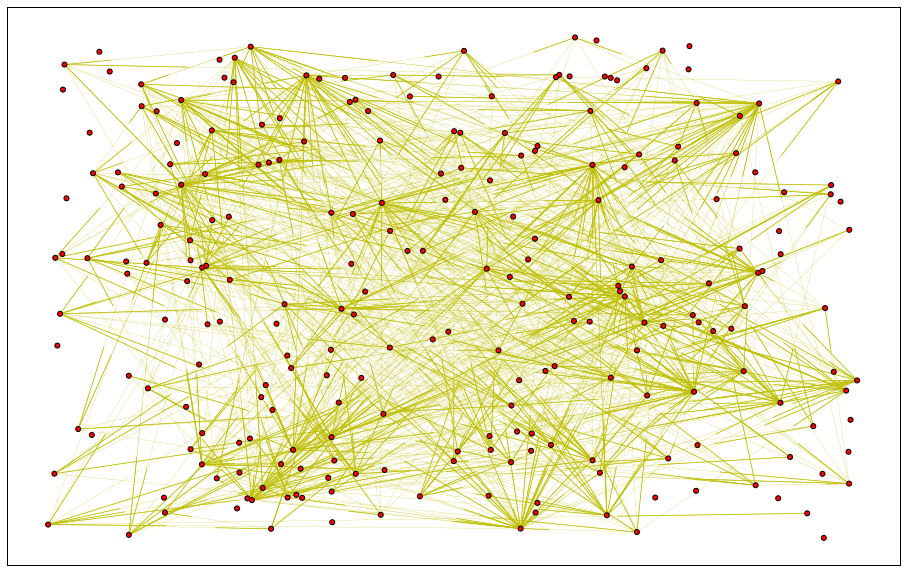

In [44]:
print_graph(NC_digraph)